In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

### Download the transaction data.

In [2]:
resp = urlopen("https://github.com/CapitalOneRecruiting/DS/raw/master/transactions.zip")
zipfile = ZipFile(BytesIO(resp.read()))
file_name = zipfile.namelist()[0]
extracted_file = zipfile.open(file_name)

### Read in the json file using Pandas and check out the summary statistics.

In [3]:
df_full = pd.read_json(extracted_file,lines=True)

In [4]:
df_full.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,...,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount,transactionDateTime,transactionType
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000,0.00,04/2020,...,Lyft,,,01,05,,,111.33,2016-01-08T19:04:50,PURCHASE
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000,111.33,06/2023,...,Uber,,,01,09,,,24.75,2016-01-09T22:32:39,PURCHASE
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000,136.08,12/2027,...,Lyft,,,01,05,,,187.40,2016-01-11T13:36:55,PURCHASE
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000,323.48,09/2029,...,Lyft,,,01,02,,,227.34,2016-01-11T22:47:46,PURCHASE
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000,550.82,10/2024,...,Lyft,,,01,02,,,0.00,2016-01-16T01:41:11,ADDRESS_VERIFICATION


In [5]:
df_full.shape

(641914, 29)

There are 641914 rows and 29 columns

In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
accountNumber               641914 non-null int64
accountOpenDate             641914 non-null object
acqCountry                  641914 non-null object
availableMoney              641914 non-null float64
cardCVV                     641914 non-null int64
cardLast4Digits             641914 non-null int64
cardPresent                 641914 non-null bool
creditLimit                 641914 non-null int64
currentBalance              641914 non-null float64
currentExpDate              641914 non-null object
customerId                  641914 non-null int64
dateOfLastAddressChange     641914 non-null object
echoBuffer                  641914 non-null object
enteredCVV                  641914 non-null int64
expirationDateKeyInMatch    641914 non-null bool
isFraud                     641914 non-null bool
merchantCategoryCode        641914 non-null object
merchantCity                6419

No null values are found in the data.

The following columns are empty. They needs to be deleted

In [9]:
Empty_cols = ['echoBuffer','merchantCity', 'merchantState','merchantZip','posOnPremises', 'recurringAuthInd']

In [10]:
for col in Empty_cols:
    values = df_full[col].unique()
    print('The values in {} column: {}'.format(col,values))

The values in echoBuffer column: ['']
The values in merchantCity column: ['']
The values in merchantState column: ['']
The values in merchantZip column: ['']
The values in posOnPremises column: ['']
The values in recurringAuthInd column: ['']


Drop off the empty columns

In [11]:
df_full = df_full.drop(Empty_cols, axis=1)

In [12]:
df_full.shape

(641914, 23)

The 6 columns above are dropped.

Transform the columns below into datatime format.

In [13]:
date_cols=['accountOpenDate', 'currentExpDate', 'dateOfLastAddressChange', 'transactionDateTime']


In [14]:
df_full[date_cols] = df_full[date_cols].apply(pd.to_datetime)

In [15]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
accountNumber               641914 non-null int64
accountOpenDate             641914 non-null datetime64[ns]
acqCountry                  641914 non-null object
availableMoney              641914 non-null float64
cardCVV                     641914 non-null int64
cardLast4Digits             641914 non-null int64
cardPresent                 641914 non-null bool
creditLimit                 641914 non-null int64
currentBalance              641914 non-null float64
currentExpDate              641914 non-null datetime64[ns]
customerId                  641914 non-null int64
dateOfLastAddressChange     641914 non-null datetime64[ns]
enteredCVV                  641914 non-null int64
expirationDateKeyInMatch    641914 non-null bool
isFraud                     641914 non-null bool
merchantCategoryCode        641914 non-null object
merchantCountryCode         641914 non-null object
merchant

In [16]:
unique_values_cols = ['acqCountry','merchantCountryCode','merchantCategoryCode','posConditionCode', 'posEntryMode',
'transactionType', 'creditLimit','cardPresent','isFraud','expirationDateKeyInMatch']

Check the unique values for the cols above

In [18]:
for col in unique_values_cols:
    values_unique = df_full[col].unique()
    print('The values in {} column: {}'.format(col,values_unique))
    print('---------------------------------------------')

The values in acqCountry column: ['US' '' 'PR' 'MEX' 'CAN']
---------------------------------------------
The values in merchantCountryCode column: ['US' 'PR' 'MEX' '' 'CAN']
---------------------------------------------
The values in merchantCategoryCode column: ['rideshare' 'online_gifts' 'personal care' 'fastfood' 'entertainment'
 'online_subscriptions' 'mobileapps' 'fuel' 'food' 'online_retail'
 'airline' 'hotels' 'food_delivery' 'cable/phone' 'subscriptions' 'auto'
 'gym' 'furniture' 'health']
---------------------------------------------
The values in posConditionCode column: ['01' '08' '99' '']
---------------------------------------------
The values in posEntryMode column: ['05' '09' '02' '90' '' '80']
---------------------------------------------
The values in transactionType column: ['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' '']
---------------------------------------------
The values in creditLimit column: [ 5000  7500   250 20000   500 50000  2500 15000  1000 10000]
----

In [35]:
df_full.describe().T

,count,mean,std,min,25%,50%,75%,max
accountNumber,641914.0,5.547701e+08,2.546884e+08,1.005471e+08,3.223192e+08,5.438879e+08,7.862277e+08,9.999853e+08
availableMoney,641914.0,6.652829e+03,9.227132e+03,-1.244930e+03,1.114970e+03,3.578165e+03,8.169185e+03,5.000000e+04
cardCVV,641914.0,5.571999e+02,2.573262e+02,1.000000e+02,3.340000e+02,5.810000e+02,7.620000e+02,9.980000e+02
cardLast4Digits,641914.0,4.886184e+03,2.859054e+03,0.000000e+00,2.364000e+03,4.873000e+03,7.267000e+03,9.998000e+03
creditLimit,641914.0,1.069721e+04,1.146036e+04,2.500000e+02,5.000000e+03,7.500000e+03,1.500000e+04,5.000000e+04
currentBalance,641914.0,4.044382e+03,5.945510e+03,0.000000e+00,5.024425e+02,2.151860e+03,5.005890e+03,4.749650e+04
customerId,641914.0,5.547701e+08,2.546884e+08,1.005471e+08,3.223192e+08,5.438879e+08,7.862277e+08,9.999853e+08
enteredCVV,641914.0,5.567752e+02,2.574026e+02,1.000000e+00,3.330000e+02,5.800000e+02,7.610000e+02,9.980000e+02
transactionAmount,641914.0,1.351625e+02,1.470533e+02,0.000000e+00,3.232000e+01,8.580000e+01,1.890300e+02,1.825250e+03


The histgram plot for the 'transactionAmount' column.

In [19]:
import numpy as np

In [20]:
tranAmount_values = df_full['transactionAmount'].values

Text(0.5, 1.0, 'Histogram')

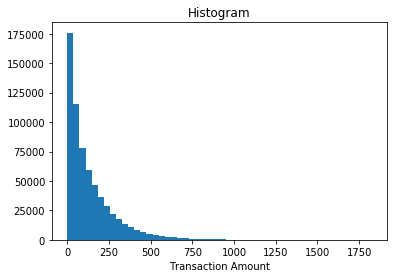

In [22]:
plt.hist(tranAmount_values, bins=50)
plt.xlabel('Transaction Amount')
plt.title('Histogram')

(array([1.75922e+05, 1.14945e+05, 7.77590e+04, 5.90560e+04, 4.66920e+04,
        3.62550e+04, 2.83050e+04, 2.23000e+04, 1.73030e+04, 1.37100e+04,
        1.06610e+04, 8.42200e+03, 6.44800e+03, 5.16900e+03, 4.15500e+03,
        3.18100e+03, 2.50600e+03, 1.98800e+03, 1.53000e+03, 1.17000e+03,
        9.54000e+02, 7.23000e+02, 5.76000e+02, 4.87000e+02, 3.88000e+02,
        3.00000e+02, 2.04000e+02, 1.78000e+02, 1.41000e+02, 1.22000e+02,
        8.30000e+01, 5.70000e+01, 4.60000e+01, 3.90000e+01, 3.80000e+01,
        2.40000e+01, 1.80000e+01, 1.20000e+01, 1.20000e+01, 6.00000e+00,
        7.00000e+00, 1.00000e+01, 2.00000e+00, 3.00000e+00, 1.00000e+00,
        1.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([   0.   ,   36.505,   73.01 ,  109.515,  146.02 ,  182.525,
         219.03 ,  255.535,  292.04 ,  328.545,  365.05 ,  401.555,
         438.06 ,  474.565,  511.07 ,  547.575,  584.08 ,  620.585,
         657.09 ,  693.595,  730.1  ,  766.605,  803.11 ,  839.6

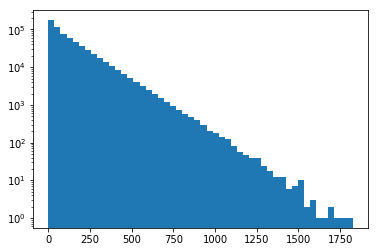

In [25]:
plt.hist((tranAmount_values),bins=50, log=True)

The log histogram of the 'transactionAmount' column bears a linear curve. So I assume that as the 
transaction amount increases, the number of associated transactions dereases exponentially.

In [26]:
from pandas.plotting import scatter_matrix

In [28]:
colors = ['red' if ix else 'blue' for ix in df_full.isFraud]

In [33]:
some_features = ['currentBalance', 'transactionAmount','availableMoney' ]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000165F82C5710>,
      dtype=object)

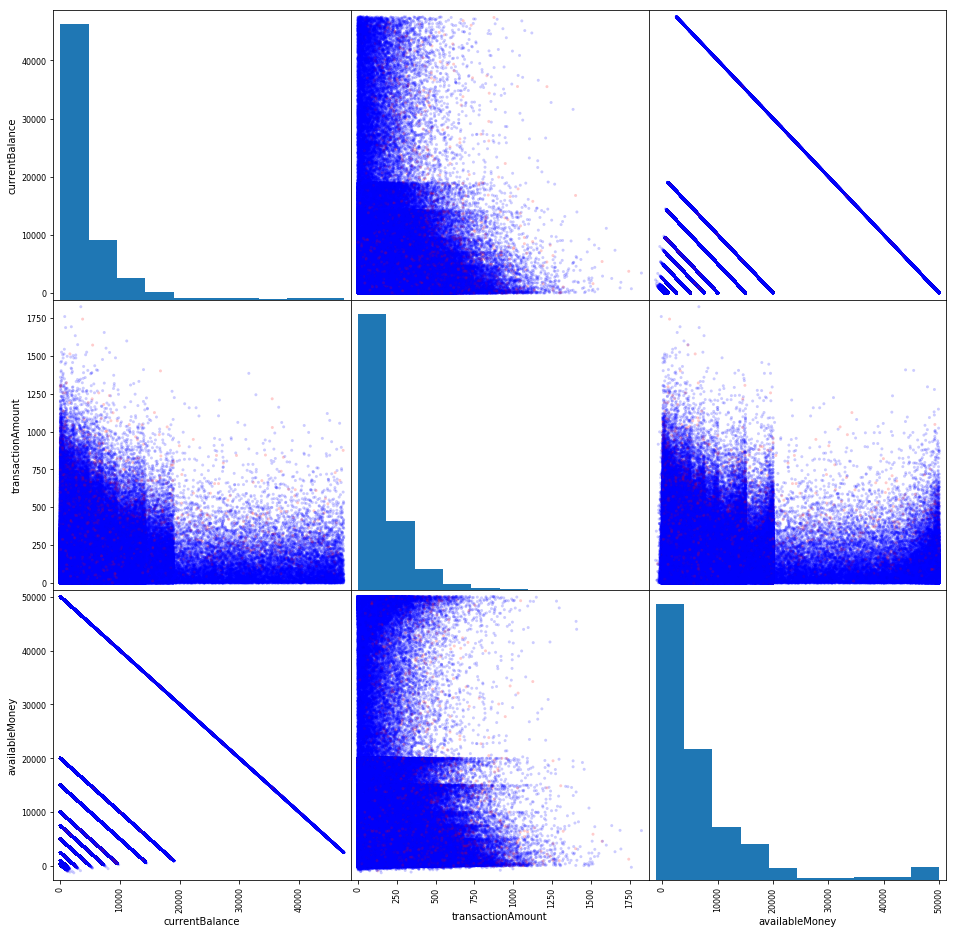

In [34]:
scatter_matrix(df_full[some_features], alpha=0.2, figsize=(16, 16), diagonal='hist', color=colors)

The scatter matrix does not show any feature which will clearly separate out Fraud vs. None-Fraud transactions.
Features engineering is important for before modeling.

### Dealing with duplicated and reversed transactions

In [46]:
df_group = df_full.groupby(['accountNumber','cardLast4Digits','transactionAmount'])['isFraud'].count()

In [50]:
df_group[df_group>=2].shape

(34269,)

if df_group>=2, there are duplicate amounts in the same account and card. Then the transaction time 
can be checked to see if they are  duplicated or reversed transactions

In [43]:
a = df_full[(df_full['transactionAmount']==0) & (df_full['transactionType']=='REVERSAL')]

In [45]:
a[['accountNumber'
,'accountOpenDate'
,'acqCountry'
,'availableMoney'
,'cardCVV'
,'cardLast4Digits','transactionAmount'
,'transactionDateTime'
,'transactionType']].head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,transactionAmount,transactionDateTime,transactionType
756,814139734,2011-09-21,US,6498.25,280,1744,0.0,2016-07-28 12:54:25,REVERSAL
1323,784469543,2008-08-21,US,727.38,479,8915,0.0,2016-08-03 21:39:53,REVERSAL
1387,784469543,2008-08-21,US,958.83,479,8915,0.0,2016-10-05 06:53:13,REVERSAL
5173,687925084,2015-06-12,US,10595.29,850,7488,0.0,2016-11-23 11:38:20,REVERSAL
5476,398189423,2012-06-13,US,46.33,807,7408,0.0,2016-02-11 09:20:02,REVERSAL


In [55]:
df_full.iloc[[750,751,752,753,753,755,756,757,758,759,760]]

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,...,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType
750,814139734,2011-09-21,US,7104.79,280,1744,False,7500,395.21,2021-12-01,...,False,False,online_retail,US,amazon.com,08,02,0.00,2016-07-10 20:36:19,ADDRESS_VERIFICATION
751,814139734,2011-09-21,US,7104.79,280,1744,False,7500,395.21,2029-01-01,...,False,False,online_retail,US,apple.com,01,09,43.77,2016-07-15 05:22:13,PURCHASE
752,814139734,2011-09-21,US,7061.02,280,1744,True,7500,438.98,2019-09-01,...,False,False,fastfood,US,Taco Bell #719034,01,09,12.50,2016-07-16 07:08:14,PURCHASE
753,814139734,2011-09-21,US,7048.52,280,1744,True,7500,451.48,2029-09-01,...,False,False,fastfood,US,KFC #489585,01,05,98.02,2016-07-23 08:39:18,PURCHASE
753,814139734,2011-09-21,US,7048.52,280,1744,True,7500,451.48,2029-09-01,...,False,False,fastfood,US,KFC #489585,01,05,98.02,2016-07-23 08:39:18,PURCHASE
755,814139734,2011-09-21,US,6762.75,280,1744,True,7500,737.25,2020-12-01,...,False,False,fastfood,US,Subway #338885,01,02,264.50,2016-07-27 23:04:36,PURCHASE
756,814139734,2011-09-21,US,6498.25,280,1744,False,7500,1001.75,2021-12-01,...,False,False,online_retail,US,amazon.com,08,02,0.00,2016-07-28 12:54:25,REVERSAL
757,814139734,2011-09-21,US,6498.25,280,1744,True,7500,1001.75,2023-04-01,...,False,False,food,US,Franks Pub #87366,01,05,106.39,2016-07-28 13:25:38,PURCHASE
758,814139734,2011-09-21,US,7500.00,280,1744,False,7500,0.00,2029-12-01,...,False,True,online_retail,US,cheapfast.com,01,09,12.17,2016-08-02 08:15:23,PURCHASE
759,814139734,2011-09-21,US,7487.83,280,1744,False,7500,12.17,2031-01-01,...,False,False,online_retail,US,discount.com,01,,465.07,2016-08-03 02:27:16,PURCHASE


For the records with 'transactionType' to be 'REVERAL', a lot of them has 'transactionAmount' of 0 and the time difference between these two
transactions can be more than a week. 
Here I will only consider the transactions are duplicated or reversed transactions if the time difference is less than 5 mins

In [56]:
df_group.value_counts()

1      526222
2       26023
3        2361
4         836
5         681
6         625
9         549
7         543
8         538
10        508
11        488
12        385
13        118
14         76
15         68
16         46
20         35
17         29
19         28
21         27
18         26
22         23
24         21
26         20
25         17
23         13
28         13
46          9
27          9
29          9
        ...  
42          6
44          5
52          5
49          4
32          4
43          4
36          3
41          3
50          3
74          2
85          2
56          2
57          2
40          2
79          2
146         1
144         1
143         1
134         1
129         1
113         1
268         1
82          1
77          1
62          1
60          1
59          1
54          1
47          1
272         1
Name: isFraud, Length: 71, dtype: int64

In [57]:
df_duplicate_group = df_group[df_group>=2]

In [103]:
def duplicate_identify(df, df_duplicate_group):
    '''Return the duplicated and reversed transactions '''
    idx_dup = df_duplicate_group.index
    df_drop = pd.DataFrame()
    
    for idx in idx_dup:
        accountNum, last4Digit, transAmount = idx
        df_filter = df[(df['accountNumber'] == accountNum) & (df['cardLast4Digits'] == last4Digit) & (df['transactionAmount'] == transAmount)]
        num = df_filter.shape[0]
        transTime = df_filter['transactionDateTime'].values
        transType = df_filter['transactionType'].values
        for i in range(num-1):
            time1 = transTime[i]
            time2 = transTime[i+1]
            delta_time = (time2 - time1) / np.timedelta64(1,'s')
            type1 = transType[i]
            type2 = transType[i+1]
            if delta_time <= 300:
                if type1==type2=='PURCHASE' or type1==type2=='':
                    df_filter = df_filter[df_filter['transactionDateTime'] != time1]
                
        df_drop = pd.concat([df_drop, df_filter], axis=0)
    
    return df_drop
            
    
    

There are large amount of data and it takes long time to preprocess it. Here I only take 10% of the whole data.

In [91]:
df_sample = df_full.sample(frac=0.1)

In [93]:
df_sample_dup = df_sample.groupby(['accountNumber','cardLast4Digits','transactionAmount'])['isFraud'].count()

In [94]:
df_sample_dup = df_sample_dup[df_sample_dup>2]

In [101]:
df_sample_drop = duplicate_identify(df_sample, df_sample_dup)

In [102]:
df_sample_drop.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,...,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType
520289,103034020,2015-09-28,US,4930.93,577,5605,True,5000,69.07,2024-03-01,...,False,False,fuel,US,Texas Gas #143387,01,02,48.69,2016-09-21 15:51:21,PURCHASE
520299,103034020,2015-09-28,US,4930.93,577,5605,True,5000,69.07,2024-03-01,...,False,False,fuel,US,Texas Gas #143387,01,02,48.69,2016-12-14 13:02:36,PURCHASE
177715,112179986,2015-10-02,US,253.58,171,4078,True,500,246.42,2024-09-01,...,False,False,fuel,US,Texas Gas #500923,01,09,48.41,2016-04-02 13:49:29,PURCHASE
177727,112179986,2015-10-02,US,71.60,171,4078,True,500,428.40,2024-09-01,...,False,False,fuel,US,Texas Gas #500923,01,09,48.41,2016-05-29 17:02:13,PURCHASE
177741,112179986,2015-10-02,US,355.94,171,4078,True,500,144.06,2024-09-01,...,False,False,fuel,US,Texas Gas #500923,01,09,48.41,2016-07-25 12:19:43,PURCHASE


In [104]:
def remove_duplicate(df,df_drop):
        ''' Drop the duplicated transactions.'''
        df_merge = df.merge(df_drop, on=list(df.columns), how='left', indicator=True)
        df = df_merge[df_merge['_merge'] =='left_only'][list(df.columns)]
        return df

In [105]:
df_sample_remove_dup = remove_duplicate(df_sample, df_sample_drop)

In [106]:
df_sample.shape

(64191, 23)

In [108]:
df_sample_drop.shape

(1526, 23)

In [110]:
a = (1526)/64191
print(a)

0.02377280304092474


In the sample data, about 2.4% of it are duplicates. This is a rough estimate to the ratio in the whole dataset since it takes a long time to 
calculate the actual value.

In [112]:
df_full[df_full['transactionType']=='ADDRESS_VERIFICATION']['transactionAmount'].mean()

0.0

The transaction amounts for the transaction type 'ADDRESS_VERIFICATION' are all 0.

# Modeling

The file data_prep.py contains the code for data preparation, feature engineering and generated a sample of the whole dataset
for modeling.  The command to run the code:  
      `python data_prep.py`  
      The output is 'card_transaction.csv'

In [114]:
df = pd.read_csv('card_transaction.csv')


##### Nomalize the data and spit it into training and testing

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
y = df.pop('isFraud')
X = df

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [120]:
minmax_scaler = MinMaxScaler()

In [121]:
minmax_scaler.fit(X_train)

C:\Users\chenz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [122]:
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

In [123]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''

    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)
    
    return tprs, fprs, thresholds.tolist()

def plot_roc(probs, y_true, title, xlabel, ylabel):
    # ROC
    tpr, fpr, thresholds = roc_curve(v_probs, y_test)

    #plt.hold(True)
    plt.plot(fpr, tpr)

    # 45 degree line
    xx = np.linspace(0, 1.0, 20)
    plt.plot(xx, xx, color='red')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()

In [125]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

C:\Users\chenz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [126]:
lr.score(X_test_scaled,y_test)

0.9801922027781275

In [127]:
v_probs = lr.predict_proba(X_test_scaled)[:, 1]

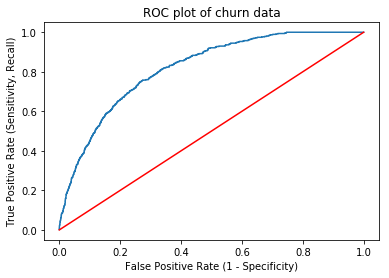

In [128]:
plot_roc(v_probs, y_test, "ROC plot of churn data", 
         "False Positive Rate (1 - Specificity)", "True Positive Rate (Sensitivity, Recall)")

In [129]:
import sklearn.metrics as skm
skm.roc_auc_score(y_test, lr.predict(X_test_scaled))

0.5010187592406862

In [130]:
pd.crosstab(y_test, lr.predict(X_test_scaled))

col_0,0.0,1.0
isFraud,,
0.0,23356,2
1.0,470,1


In [131]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_true):
    '''Code stolen brazenly from sklearn example.'''
    cm = confusion_matrix(y_true, model.predict(X_test))

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[23356     2]
 [  470     1]]


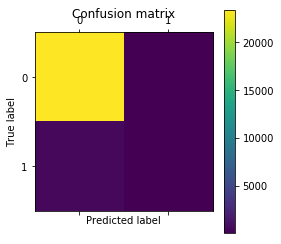

In [132]:

plot_confusion_matrix(lr, X_test_scaled, y_test)

This is a simple model on a small sample of data. It has a lot of false positive and false negative.

### A slightly better crappy model: gradient boosting classification trees

In [133]:

from sklearn.ensemble import GradientBoostingClassifier

In [134]:

gbc = GradientBoostingClassifier(n_estimators=100, max_depth=4, subsample=0.5, 
                                  learning_rate=0.05)
gbc.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.5, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [135]:
gbc.score(X_test_scaled,y_test)

0.9800663057618868

In [136]:
pd.crosstab(y_test, gbc.predict(X_test_scaled))

col_0,0.0,1.0
isFraud,,
0.0,23352,6
1.0,469,2


In [137]:
skm.roc_auc_score(y_test, gbc.predict(X_test_scaled))

0.5019947065967932

[[23352     6]
 [  469     2]]


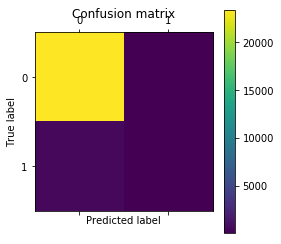

In [138]:

plot_confusion_matrix(gbc, X_test_scaled, y_test)

### let's see if random forest gives better performance

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [142]:

rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [143]:

rfc.score(X_test_scaled, y_test)

0.9801922027781275

In [144]:

pd.crosstab(y_test, rfc.predict(X_test_scaled))

col_0,0.0,1.0
isFraud,,
0.0,23357,1
1.0,471,0


In [173]:
skm.roc_auc_score(y_test, rfc.predict(X_test_scaled))

0.49997859405771045

[[23357     1]
 [  471     0]]


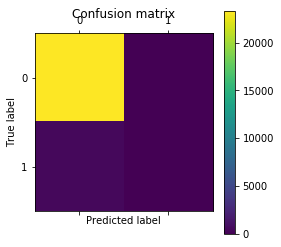

In [174]:

plot_confusion_matrix(rfc, X_test_scaled, y_test)

### Refine model

#### 1, Use the whole dataset to train the model and grid search to find the best tuning of each model.  
#### 2, Compare different classification models. Try ensemble methods(VotingClassifier and StackingClassifer).  
#### 3, Explore feature engineering.  
#### 4, Tune with profit curve based on costs of different classification errors, if the lost matric can be provided
#### 5, The class distribution is highly imballanced. Use oversampling(SMOTE).

### Refine random forest model model via grid search

In [150]:
from sklearn.model_selection import GridSearchCV

In [158]:

rf_grid = {
    'max_depth': [8],
    'max_features': [None],
    'bootstrap': [True], 
    'n_estimators': [100, 200],
    'random_state': [67],
    'oob_score': [True],
    'n_jobs': [-1]
    }

Only a few search parameters are provided due to large amount of training time.

In [159]:

rf_grid_cv = GridSearchCV(RandomForestClassifier(),
                             rf_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='roc_auc')

In [160]:

rf_grid_cv.fit(X_train_scaled, y_train)

C:\Users\chenz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [8], 'max_features': [None], 'bootstrap': [True], 'n_estimators': [100, 200], 'random_state': [67], 'oob_score': [True], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=True)

In [162]:

best_model = rf_grid_cv.best_estimator_

In [163]:

best_params = rf_grid_cv.best_params_
best_params

{'bootstrap': True,
 'max_depth': 8,
 'max_features': None,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 67}

In [165]:
rf_grid_cv.best_score_

0.8105722617567729

In [167]:

skm.roc_auc_score(y_test, best_model.predict(X_test_scaled))

0.5021017363082412

In [168]:
def plot_importance(clf, X, max_features=10):
    '''Plot feature importance'''
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    # Show only top features
    pos = pos[-max_features:]
    feature_importance = (feature_importance[sorted_idx])[-max_features:]
    feature_names = (X.columns[sorted_idx])[-max_features:]
    
    plt.barh(pos, feature_importance, align='center')
    plt.yticks(pos, feature_names)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')

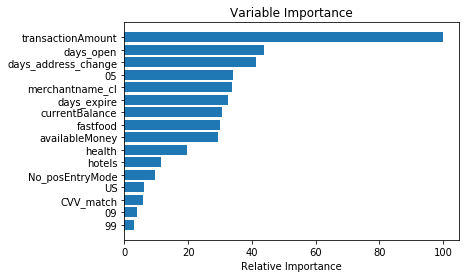

In [170]:
plot_importance(best_model, df, max_features=16)

 The most important features: transactionAmount, days_open, and days_address_change. 

[[23357     1]
 [  469     2]]


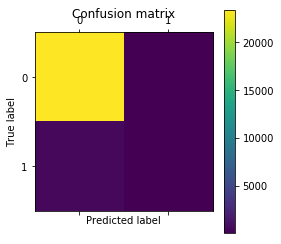

In [177]:
plot_confusion_matrix(best_model, X_test_scaled, y_test)

## Following the strategies above to improve the model performance.